In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

(-0.5, 1199.5, 1599.5, -0.5)

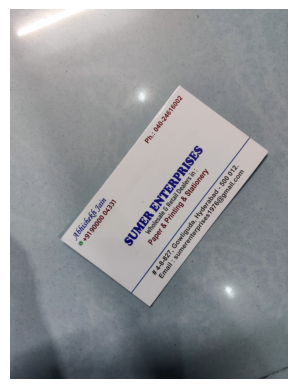

In [2]:
img = cv2.imread("data/03.jpg")

plt.imshow(img)
plt.axis("off")

# Scanning

### Resize the image and set aspect ratio

In [3]:
def resizer(image, width=500):
    # get width and height
    h, w, c = image.shape
    height = int((h/w)*width)
    size = (width, height)
    image = cv2.resize(image, (width, height))
    
    return image, size

(500, 666)


(-0.5, 499.5, 665.5, -0.5)

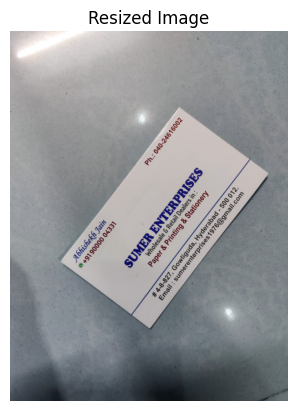

In [4]:
img_re, size = resizer(img)

print(size)
plt.imshow(img_re)
plt.title("Resized Image")
plt.axis("off")

### Image Processing

### Enhance

[[ 732  324]
 [ 199  974]
 [ 597 1296]
 [1118  640]]


(-0.5, 499.5, 665.5, -0.5)

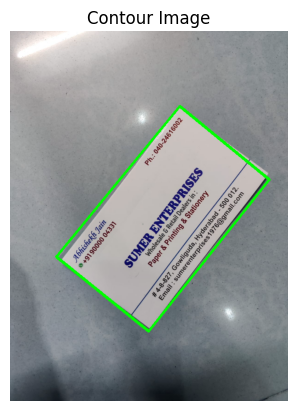

In [5]:
detail = cv2.detailEnhance(img_re, sigma_s=20, sigma_r=0.15)
gray = cv2.cvtColor(detail, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Edge Detection using Canny
edge_image = cv2.Canny(blur, 75, 200)

# Morphological Transform
kernel = np.ones((5,5), np.uint8)
dilate = cv2.dilate(edge_image, kernel, iterations=1)
closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel)

# Find Contours
contours, hier = cv2.findContours(closing, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02*peri, True)
    if len(approx) == 4:
        four_points = np.squeeze(approx)
        break
        
cv2.drawContours(img_re, [four_points], -1, (0,255,0), 3)

# Find Four Points for Original Image
multiplier = img.shape[1] / size[0]
four_points = four_points*multiplier
four_points = four_points.astype(int)

print(four_points)

plt.imshow(img_re)
plt.title("Contour Image")
plt.axis("off")

In [6]:
from imutils.perspective import four_point_transform

(-0.5, 839.5, 510.5, -0.5)

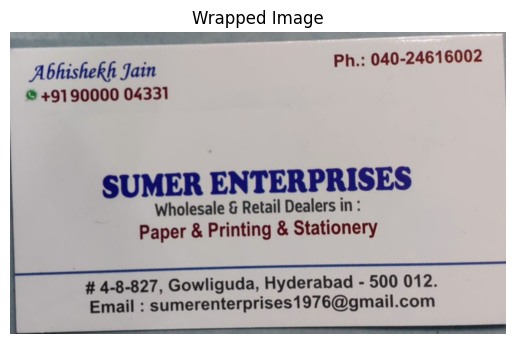

In [7]:
wrap_img = four_point_transform(img, four_points)

plt.imshow(wrap_img)
plt.title("Wrapped Image")
plt.axis("off")

# Document Scanner Function

In [8]:
def document_scanner(image):

    img_re, size = resizer(image)
    detail = cv2.detailEnhance(img_re, sigma_s=20, sigma_r=0.15)
    gray = cv2.cvtColor(detail, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # Edge Detection using Canny
    edge_image = cv2.Canny(blur, 75, 200)

    # Morphological Transform
    kernel = np.ones((5,5), np.uint8)
    dilate = cv2.dilate(edge_image, kernel, iterations=1)
    closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel)

    # Find Contours
    contours, hier = cv2.findContours(closing, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    for contour in contours:
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02*peri, True)
        if len(approx) == 4:
            four_points = np.squeeze(approx)
            break

    cv2.drawContours(img_re, [four_points], -1, (0,255,0), 3)

    # Find Four Points for Original Image
    multiplier = image.shape[1] / size[0]
    four_points = four_points*multiplier
    four_points = four_points.astype(int)

    wrap_img = four_point_transform(image, four_points)
    
    return wrap_img, four_points, img_re, closing

(-0.5, 839.5, 510.5, -0.5)

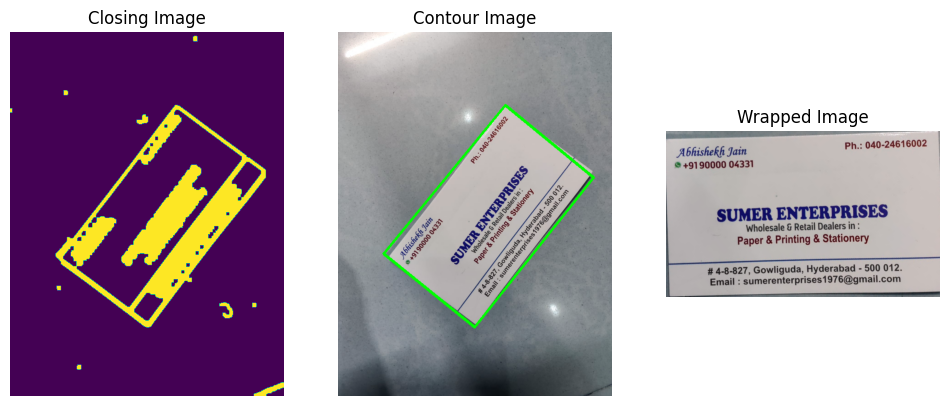

In [9]:
image = cv2.imread("data/03.jpg")
wrap, four_point, img_re, closing = document_scanner(image)

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(closing)
plt.title("Closing Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_re)
plt.title("Contour Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(wrap)
plt.title("Wrapped Image")
plt.axis("off")

(-0.5, 923.5, 594.5, -0.5)

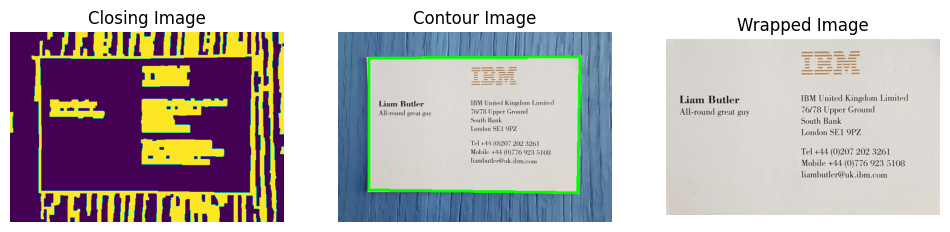

In [10]:
image = cv2.imread("data/001.jpg")
wrap, four_point, img_re, closing = document_scanner(image)

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(closing)
plt.title("Closing Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_re)
plt.title("Contour Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(wrap)
plt.title("Wrapped Image")
plt.axis("off")

(-0.5, 2619.5, 1480.5, -0.5)

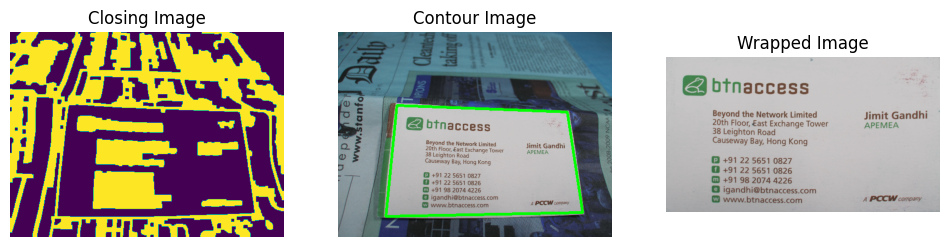

In [11]:
image = cv2.imread("data/033.jpg")
wrap, four_point, img_re, closing = document_scanner(image)

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(closing)
plt.title("Closing Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_re)
plt.title("Contour Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(wrap)
plt.title("Wrapped Image")
plt.axis("off")

(-0.5, 2290.5, 1465.5, -0.5)

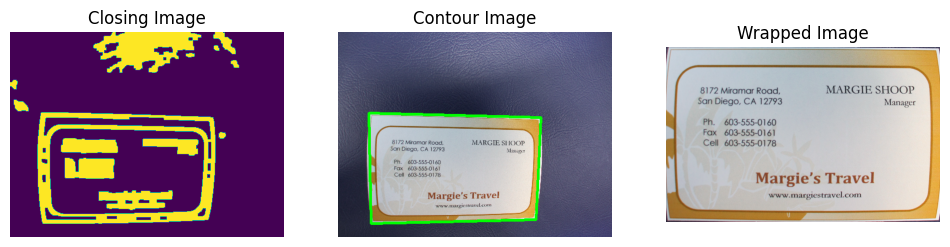

In [12]:
image = cv2.imread("data/015.jpg")
wrap, four_point, img_re, closing = document_scanner(image)

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(closing)
plt.title("Closing Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_re)
plt.title("Contour Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(wrap)
plt.title("Wrapped Image")
plt.axis("off")

# Magic Color

In [13]:
def apply_brightness_contrast(input_img, brightness=0, contrast=0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow
            
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    
    else:
        buf = input_img.copy()
        
    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)
        
    return buf

(-0.5, 839.5, 510.5, -0.5)

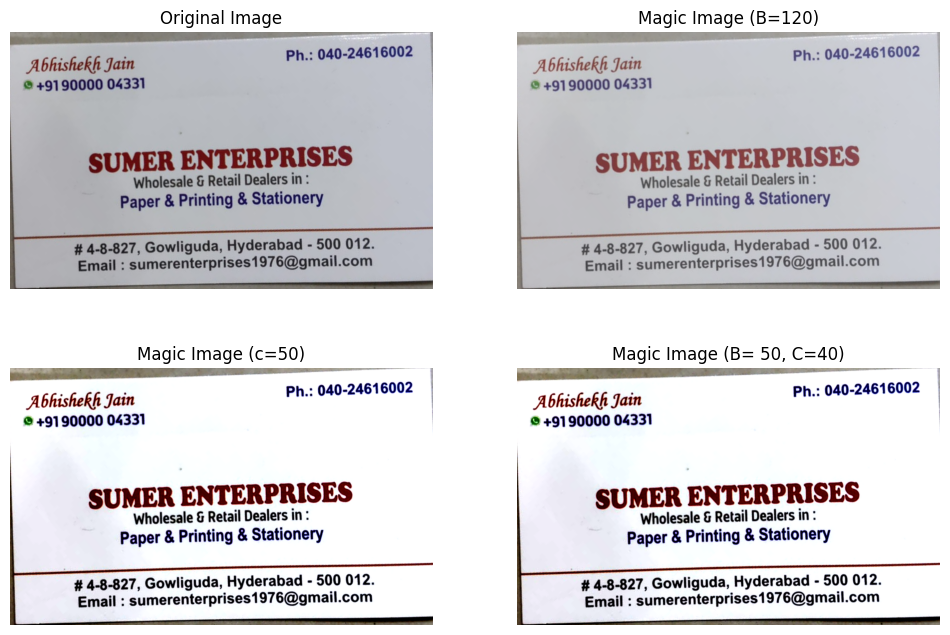

In [14]:
image = cv2.imread("data/03.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

wrap, four_point, img_re, closing = document_scanner(image)

magic_image = apply_brightness_contrast(wrap, 50, 0)
magic_image_cont = apply_brightness_contrast(wrap, 0, 50)
magic_image_cont_brig = apply_brightness_contrast(wrap, 50, 40)


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(wrap)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(magic_image)
plt.title("Magic Image (B=120)")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(magic_image_cont)
plt.title("Magic Image (c=50)")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(magic_image_cont)
plt.title("Magic Image (B= 50, C=40)")
plt.axis("off")

(-0.5, 923.5, 594.5, -0.5)

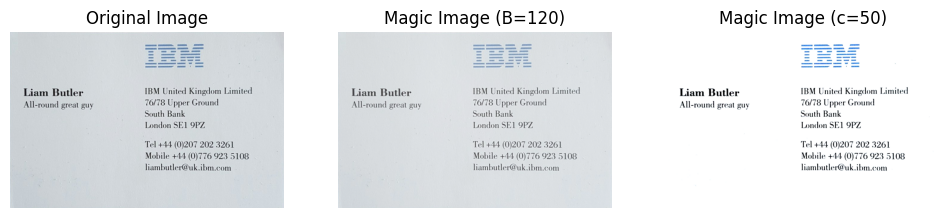

In [15]:
image = cv2.imread("data/001.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

wrap, four_point, img_re, closing = document_scanner(image)

magic_image = apply_brightness_contrast(wrap, 50, 0)
magic_image_cont = apply_brightness_contrast(wrap, 0, 50)


plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(wrap)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(magic_image)
plt.title("Magic Image (B=120)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(magic_image_cont)
plt.title("Magic Image (c=50)")
plt.axis("off")

# Predictions

In [16]:
from VERSION_2 import predictions as pred

Liam Butler All-round great guy IBM United Kingdom Limited 76/78 Upper Ground South Bank London SE1 9PZ Tel 44 0207 202 3261 Mobile 44 0776 923 5108 liambutler@uk.ibm.com


(-0.5, 923.5, 594.5, -0.5)

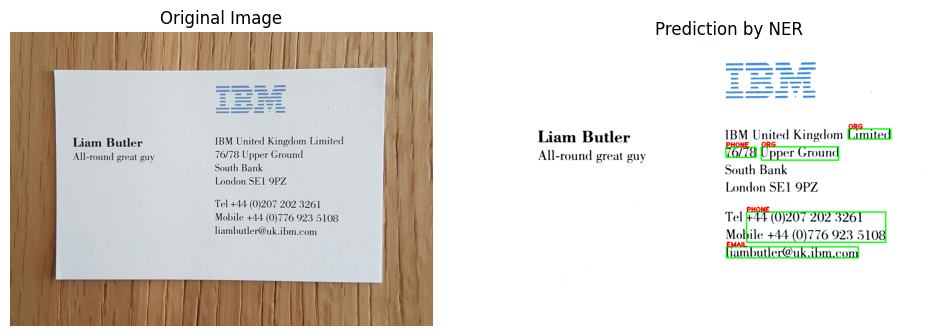

In [17]:
image = cv2.imread("data/001.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

wrap, four_point, img_re, closing = document_scanner(image)
magic_image_cont = apply_brightness_contrast(wrap, 0, 50)

img_bouding_box, results = pred.getPredictions(magic_image_cont)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Prediction by NER")
plt.imshow(img_bouding_box)
plt.axis("off")

In [18]:
results

{'NAME': [],
 'ORG': ['Limited', 'Upper Ground'],
 'DES': [],
 'PHONE': ['7678', '440207', '4407769235108'],
 'EMAIL': ['liambutler@uk.ibm.com'],
 'WEB': []}

gi eerie Me Abhishekh Jain ® 9190000 04331 Ph. 040-24616002 SUMER ENTERPRISES Wholesale Retail Dealers in Paper Printing Stationery 4-8-827, Gowliguda, Hyderabad - 500 012. Email sumerenterprises1976@gmail.com


(-0.5, 839.5, 510.5, -0.5)

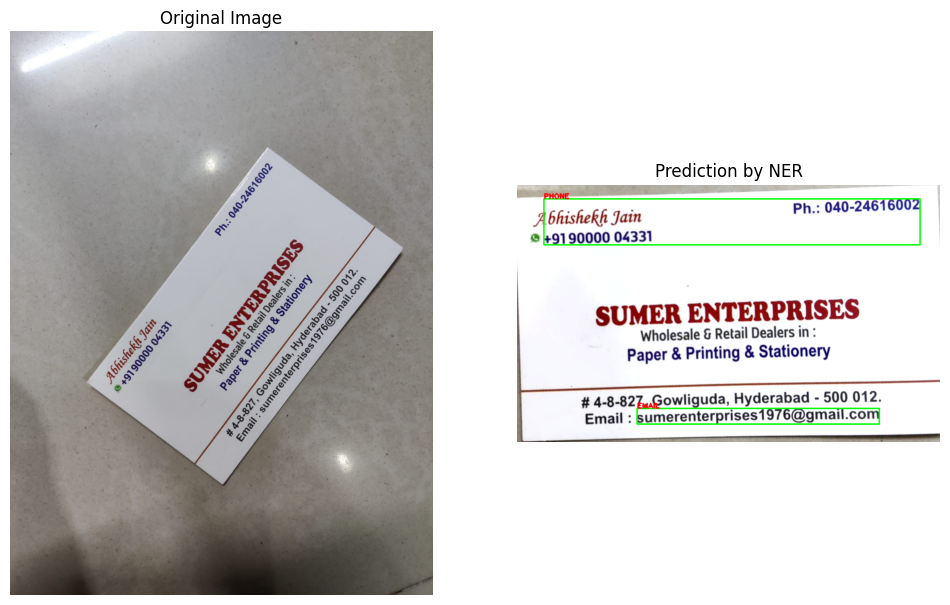

In [19]:
image = cv2.imread("data/03.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

wrap, four_point, img_re, closing = document_scanner(image)

magic_image_cont_brig = apply_brightness_contrast(wrap, 50, 40)

img_bouding_box, results = pred.getPredictions(magic_image_cont_brig)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Prediction by NER")
plt.imshow(img_bouding_box)
plt.axis("off")

In [20]:
results

{'NAME': [],
 'ORG': [],
 'DES': [],
 'PHONE': ['9190000', '040'],
 'EMAIL': ['sumerenterprises1976@gmail.com'],
 'WEB': []}

Ga btnaccess Beyond the Network Limited Jimit Gandhi 20th Floor, East Exchange Tower APEMEA 38 Leighton Road Causeway Bay, Hong Kong © 91 22 5651 0827 91 22 5651 0826 91 98 2074 4226 igandhi@btnaccess.com ompalny www.btnaccess.com A POCW comp


(-0.5, 2619.5, 1480.5, -0.5)

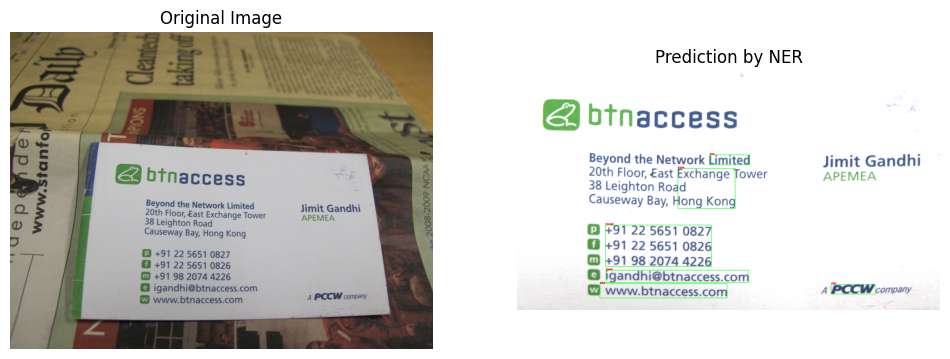

In [21]:
image = cv2.imread("data/033.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

wrap, four_point, img_re, closing = document_scanner(image)

magic_image_cont_brig = apply_brightness_contrast(wrap, 50, 40)

img_bouding_box, results = pred.getPredictions(magic_image_cont_brig)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Prediction by NER")
plt.imshow(img_bouding_box)
plt.axis("off")

In [22]:
results

{'NAME': [],
 'ORG': ['Limited', 'Pocw'],
 'DES': [],
 'PHONE': ['912256510827', '9122', '91', '4226'],
 'EMAIL': ['exchange', 'kong', 'igandhi@btnaccess.com'],
 'WEB': ['www.btnaccess.com']}

8172 Miramar Road, MARGIE SHOOPp san Diego, CA 12793 Manager Ph. 603-555-0160 Fax 603-555-016 Cell 603-555-0178 Margie’s Travel www.margiestravel.com


(-0.5, 2283.5, 1465.5, -0.5)

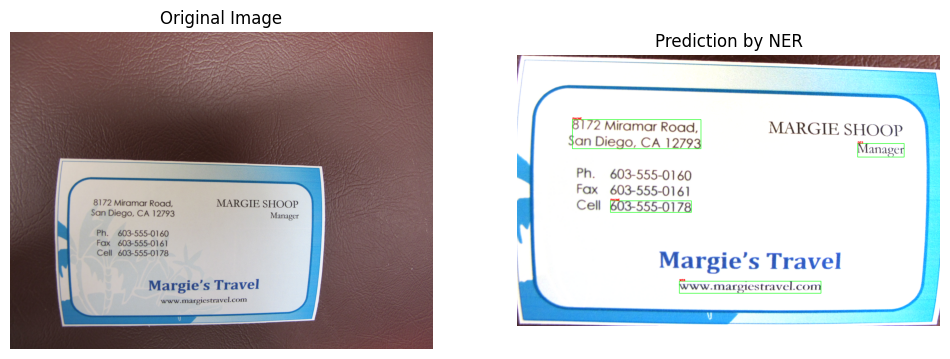

In [23]:
image = cv2.imread("data/015.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

wrap, four_point, img_re, closing = document_scanner(image)

magic_image_cont_brig = apply_brightness_contrast(wrap, 50, 40)

img_bouding_box, results = pred.getPredictions(magic_image_cont_brig)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Prediction by NER")
plt.imshow(img_bouding_box)
plt.axis("off")

In [24]:
results

{'NAME': [],
 'ORG': [],
 'DES': ['Manager'],
 'PHONE': ['8172', '12793', '603'],
 'EMAIL': [],
 'WEB': ['www.margiestravel.com']}